# Exploring Image Classification of Artwork

This project explores various image classification methods to categorize artwork by artistic style. We aim to identify styles such as Pop Art, Realism, Baroque, and others using techniques like Convolutional Neural Networks (CNNs), data augmentation, and the ResNet50 model. Our goal is to evaluate these methods and determine which yields the most accurate classification results.

Our dataset currently contains 81444 unique images from 1119 different artists in 27 styles

## Import Dataset



In [1]:
pip install kaggle

In [2]:
import kagglehub

# Download WikiArt dataset
path = kagglehub.dataset_download("steubk/wikiart")

print("Path to dataset files:", path)
path = kagglehub.dataset_download("steubk/wikiart")

print(path)

Path to dataset files: /kaggle/input/wikiart
/kaggle/input/wikiart


In [3]:
# View files in Wikiart
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
dataset_path = path
dataset_length = len(os.listdir(dataset_path))
print(f"The dataset contains {dataset_length} items.")
items = os.listdir(path)
print(items)

The dataset contains 29 items.
['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'classes.csv', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'wclasses.csv', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impressionism', 'Art_Nouveau_Modern', 'Realism']


In [4]:
all_items = os.listdir(path)
print(all_items)
files = [item for item in all_items if os.path.isfile(os.path.join(path, item))]
folders = [item for item in all_items if os.path.isdir(os.path.join(path, item))]

print("Files:", files)
print("Folders:", folders)

['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'classes.csv', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'wclasses.csv', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impressionism', 'Art_Nouveau_Modern', 'Realism']
Files: ['classes.csv', 'wclasses.csv']
Folders: ['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impression

In [5]:
import tensorflow as tf

# Set parameters
dataset_path = path
img_size = (224, 224)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# ✅ Step 1: Load dataset unbatched
full_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=None,  # Unbatched for exact splitting
    shuffle=True,
    seed=42
)

# ✅ Step 2: Count total samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size  # Remaining goes to test

# ✅ Step 3: Split dataset
train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size).take(val_size)
test_dataset = full_dataset.skip(train_size + val_size)

# ✅ Step 4: Normalize, batch, and prefetch
def normalize_img(img, label):
    return tf.cast(img, tf.float32) / 255.0, label

train_dataset = train_dataset.map(normalize_img).batch(batch_size).cache().shuffle(1000).prefetch(AUTOTUNE)
val_dataset = val_dataset.map(normalize_img).batch(batch_size).cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.map(normalize_img).batch(batch_size).cache().prefetch(AUTOTUNE)

# ✅ Get class names
class_names = full_dataset.class_names
print("✅ Classes:", class_names)
print(f"Train: {train_size}, Val: {val_size}, Test: {test_size}")


Found 81444 files belonging to 27 classes.
✅ Classes: ['Abstract_Expressionism', 'Action_painting', 'Analytical_Cubism', 'Art_Nouveau_Modern', 'Baroque', 'Color_Field_Painting', 'Contemporary_Realism', 'Cubism', 'Early_Renaissance', 'Expressionism', 'Fauvism', 'High_Renaissance', 'Impressionism', 'Mannerism_Late_Renaissance', 'Minimalism', 'Naive_Art_Primitivism', 'New_Realism', 'Northern_Renaissance', 'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Symbolism', 'Synthetic_Cubism', 'Ukiyo_e']
Train: 57010, Val: 12216, Test: 12218


In [ ]:
import matplotlib.pyplot as plt

def show_images_with_labels(dataset, class_names, num_images=5):
    plt.figure(figsize=(5 * num_images, 5))

    count = 0
    for item in dataset:
        if isinstance(item, tuple) and item[0].shape.ndims == 4:
            images, labels = item
            for i in range(images.shape[0]):
                if count >= num_images:
                    break
                img = images[i].numpy()
                label = labels[i].numpy()
                class_name = class_names[label]

                ax = plt.subplot(1, num_images, count + 1)
                ax.imshow(img.astype("uint8") if img.max() > 1 else img)
                ax.set_title(f"{class_name}")
                ax.axis("off")
                count += 1
        else:
            img, label = item
            img = img.numpy()
            label = label.numpy()
            class_name = class_names[label]

            ax = plt.subplot(1, num_images, count + 1)
            ax.imshow(img.astype("uint8") if img.max() > 1 else img)
            ax.set_title(f"{class_name}")
            ax.axis("off")
            count += 1

        if count >= num_images:
            break

    plt.tight_layout()
    plt.show()
show_images_with_labels(train_dataset, class_names, num_images=5)


# Part 1 - Train the Model (Baseline)


*   Train Model
*   Plot the model's accuracy and error
*   Test Score


In [24]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),


    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Build baseline
input_shape = (224, 224, 3)
baseline = model

In [26]:
 baseline.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 222, 222, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 109, 109, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 52, 52, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 512)    │     1,179,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 10, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             

 Total params: 1,606,139 (6.13 MB)

 Trainable params: 1,604,155 (6.12 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.1899 - loss: 2.7920 - val_accuracy: 0.2515 - val_loss: 2.4837
Epoch 2/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.2614 - loss: 2.3841 - val_accuracy: 0.2751 - val_loss: 2.2783
Epoch 3/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.2906 - loss: 2.2608 - val_accuracy: 0.2936 - val_loss: 2.2435
Epoch 4/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3108 - loss: 2.1838 - val_accuracy: 0.3398 - val_loss: 2.0821
Epoch 5/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3265 - loss: 2.1264 - val_accuracy: 0.2946 - val_loss: 2.1867
Epoch 6/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3388 - loss: 2.0830 - val_accuracy: 0.2940 - val_loss: 2.2217
Epoch 7/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.3485 - loss: 2.0365 - val_accuracy: 0.3403 - val_loss: 2.1034
Epoch 8/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3549 -

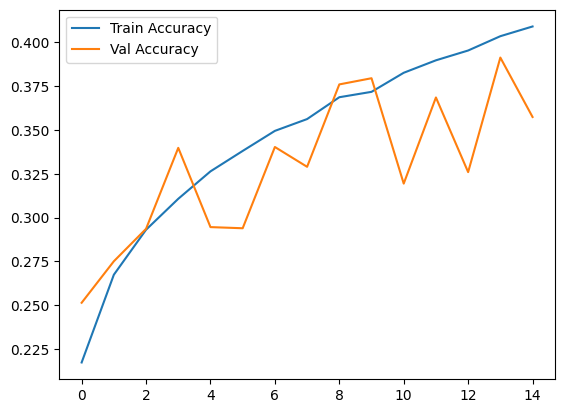

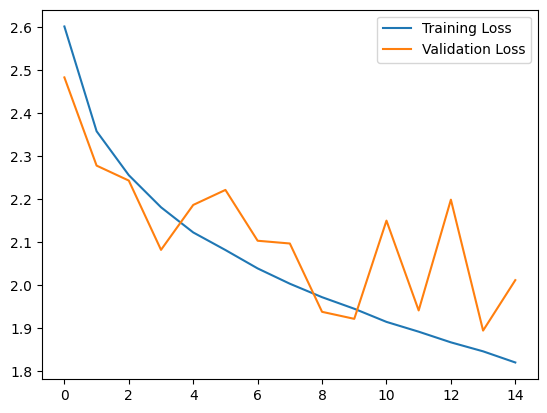

In [27]:
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Batch the datasets
batch_size = 16

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath="baseline.keras", save_best_only=True, monitor="val_loss")
]

history = baseline.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    callbacks=callbacks
)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Part 2 - Use Data Augmentation


This is a section for data augmentation.

In [ ]:
# from sklearn.metrics import classification_report
# import matplotlib.pyplot as plt
# import tensorflow as tf
# import keras
# import numpy as np
# import random
# import cv2
# import os


# def flip_image(image):
#       flipped_img = cv2.flip(image, 1)

#       return flipped_img


# def rotate_image(image, angle):
#     height, width = image.shape[:2]
#     center = (width/2, height/2)
#     rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
#     rotated_img = cv2.warpAffine(image, rotation_matrix, (width, height))
#     return rotated_img

# def augment_image(image):
#   # Randomly flip the image horizontally
#     if np.random.rand() > 0.5:
#         image = flip_image(image)

#     # Randomly rotate the image
#     angle = np.random.uniform(-10, 10)
#     image = rotate_image(image, angle)

#     return image

# def get_features_and_labels(dataset, conv_base):
#     all_features = []
#     all_labels = []
#     for images, labels in dataset:
#       preprocessed_images = keras.applications.vgg16.preprocess_input(images)
#       features = conv_base.predict(preprocessed_images)
#       all_features.append(features)
#       all_labels.append(labels)

#     return np.concatenate(all_features), np.concatenate(all_labels)

# def load_data(data_path):
#   image_files = []
#     labels = []
#     for folder in os.listdir(data_path):
#         folder_path = os.path.join(data_path, folder)
#         for file_name in os.listdir(folder_path):
#             file_path = os.path.join(folder_path, file_name)
#             image_files.append(file_path)
#             if type(folder) is not str:
#                 folder = folder.decode('utf8')
#             labels.append(1 if folder == 'dog' else 0)

#     return image_files, labels


# def data_generator(data_path, img_shape, augment, normalize, shuffle):
#   # Get list of image file names and their corresponding labels
#     image_files, labels = load_data(data_path)

#     # Convert labels to numpy array
#     labels = np.array(labels)

#     # Shuffle images and labels
#     if shuffle:
#         idxs = np.random.permutation(len(labels))
#         image_files = [image_files[i] for i in idxs]
#         labels = labels[idxs]

#     for idx in range(len(image_files)):

#         # Load image and label
#         label = labels[idx]
#         file_path = image_files[idx]
#         img = cv2.imread(file_path.decode('utf-8'))

#         # Correct BGR to RGB color
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         # Resize image to expected size
#         img = cv2.resize(img, img_shape)

#         if augment:
#           # Augment image
#           img = augment_image(img)

#         if normalize:
#           # Normalize image to within [0,1]
#           img = img / 255.

#         yield img, label

# def create_dataset(data_path, batch_size, img_shape, augment=False, normalize=True, shuffle=True):
#   output_size = img_shape + (3,)
#     dataset = tf.data.Dataset.from_generator(
#         data_generator,
#         args=[data_path, img_shape, augment, normalize, shuffle],
#         output_signature=(
#             tf.TensorSpec(shape=output_size, dtype=tf.float32),
#             tf.TensorSpec(shape=(), dtype=tf.uint8)))

#     # Add augmented images
#     if augment:
#         dataset_aug = tf.data.Dataset.from_generator(
#             data_generator,
#             args=[data_path, img_shape, augment, normalize, shuffle],
#             output_signature=(
#                 tf.TensorSpec(shape=output_size, dtype=tf.float32),
#                 tf.TensorSpec(shape=(), dtype=tf.uint8)
#                 )
#             )
#         dataset = dataset.concatenate(dataset_aug)

#     dataset = dataset.batch(batch_size)

#     return dataset

# def explore_data(train_ds, data_home, class_names):
#     """
#     Plots the distribution of classes in the training, validation, and test sets, and displays a sample of images from the
#     training set.

#     Parameters
#     ----------
#     train_ds : tf.data.Dataset
#       A dataset object for the training set.
#     data_home : str
#       The directory path to the dataset.
#     class_names : List[str]
#       A list of class names.

#     Returns
#     -------
#     None

#     """
#     # Plot the distribution of classes in the training, validation, and test sets
#     fig, ax = plt.subplots(1, 3, figsize=(10, 5))

#     # Plot the distribution of classes in the training set
#     image_files, labels = load_data(os.path.join(data_home, 'train'))
#     train_class_counts = labels
#     ax[0].bar(range(len(class_names)), np.bincount(train_class_counts))
#     ax[0].set_xticks(range(len(class_names)))
#     ax[0].set_xticklabels(class_names, rotation=45)
#     ax[0].set_title('Training set')

#     # Plot the distribution of classes in the validation set
#     image_files, labels = load_data(os.path.join(data_home, 'validation'))
#     val_class_counts = labels
#     ax[1].bar(range(len(class_names)), np.bincount(val_class_counts))
#     ax[1].set_xticks(range(len(class_names)))
#     ax[1].set_xticklabels(class_names, rotation=45)
#     ax[1].set_title('Validation set')

#     # Plot the distribution of classes in the test set
#     image_files, labels = load_data(os.path.join(data_home, 'test'))
#     test_class_counts = labels
#     ax[2].bar(range(len(class_names)), np.bincount(test_class_counts))
#     ax[2].set_xticks(range(len(class_names)))
#     ax[2].set_xticklabels(class_names, rotation=45)
#     ax[2].set_title('Test set')

#     plt.show()


# def plot_loss(history):
#     """
#     Plot the training and validation loss and accuracy.

#     Parameters
#     ----------
#     history : keras.callbacks.History
#       The history object returned by the `fit` method of a Keras model.

#     Returns
#     -------
#     None

#     """
#     # Get metrics
#     accuracy = history.history["accuracy"]
#     val_accuracy = history.history["val_accuracy"]
#     loss = history.history["loss"]
#     val_loss = history.history["val_loss"]

#     # Get number of epochs for x-axis
#     epochs = range(1, len(accuracy) + 1)

#     # Plot
#     plt.plot(epochs, accuracy, "bo", label="Training accuracy")
#     plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
#     plt.title("Training and validation accuracy")
#     plt.legend()
#     plt.figure()
#     plt.plot(epochs, loss, "bo", label="Training loss")
#     plt.plot(epochs, val_loss, "b", label="Validation loss")
#     plt.title("Training and validation loss")
#     plt.legend()
#     plt.show()





IndentationError: unexpected indent (<ipython-input-12-d810e0fd151a>, line 48)

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

# Create data augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),  # Random horizontal flips
    layers.RandomRotation(0.2),       # Random rotations up to 20%
])

In [29]:
# Define model with data augmentation
augmented_model = keras.models.Sequential([
    # Add the data augmentation as the first layer
    data_augmentation,

    # Continue with your existing architecture
    layers.Conv2D(32, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')
])

augmented_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Batch the datasets
batch_size = 16

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath="baseline.keras", save_best_only=True, monitor="val_loss")
]

history = augmented_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    callbacks=callbacks
)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()



Epoch 1/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 67s 33ms/step - accuracy: 0.1324 - loss: 3.1802 - val_accuracy: 0.2082 - val_loss: 2.6607
Epoch 2/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.1967 - loss: 2.7352 - val_accuracy: 0.2208 - val_loss: 2.5589
Epoch 3/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.2105 - loss: 2.6392 - val_accuracy: 0.2443 - val_loss: 2.4661
Epoch 4/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.2229 - loss: 2.5674 - val_accuracy: 0.2442 - val_loss: 2.4430
Epoch 5/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.2352 - loss: 2.5116 - val_accuracy: 0.2487 - val_loss: 2.4333
Epoch 6/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.2419 - loss: 2.4732 - val_accuracy: 0.2582 - val_loss: 2.3983
Epoch 7/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.2513 - loss: 2.4286 - val_accuracy: 0.2630 - val_loss: 2.3789
Epoch 8/15
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.2566 -

# Part 3 - Use Resnet50 to classify images

In [30]:
import keras
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze feature extractor


In [31]:
# Utility functions for data exploration and training visualization

def get_label_counts(dataset, num_classes):
    label_counts = np.zeros(num_classes, dtype=int)
    for _, labels in dataset.unbatch():
        label_counts[int(labels.numpy())] += 1
    return label_counts

def explore_data(train_dataset, val_dataset, test_dataset, class_names):
    num_classes = len(class_names)

    # Plot class distribution
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    for i, (counts, title) in enumerate(zip(
        [get_label_counts(train_dataset, num_classes),
         get_label_counts(val_dataset, num_classes),
         get_label_counts(test_dataset, num_classes)],
        ['Train Set', 'Validation Set', 'Test Set'])):

        ax[i].bar(range(num_classes), counts)
        ax[i].set_xticks(range(num_classes))
        ax[i].set_xticklabels(class_names, rotation=90)
        ax[i].set_title(title)

    plt.tight_layout()
    plt.show()

    # Sample images
    plt.figure(figsize=(10, 6))
    for images, labels in train_dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            img = images[i].numpy()
            # Normalize to [0, 1] for display if not already
            img = (img - img.min()) / (img.max() - img.min() + 1e-5)
            plt.imshow(img)
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.tight_layout()
    plt.show()


def plot_loss(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    # Accuracy
    plt.plot(epochs, accuracy, "bo", label="Training acc")
    plt.plot(epochs, val_accuracy, "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    # Loss
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()


In [ ]:
# # ResNet50 + Custom Classification Head

# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications.resnet50 import preprocess_input
# import os

# # === Parameters ===
# path = "/kaggle/input/wikiart"  # already defined from import dataset
# batch_size = 16
# img_size = (100, 100)
# num_classes = 27
# AUTOTUNE = tf.data.AUTOTUNE

# # === Load Datasets ===
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#     path,
#     validation_split=0.2,
#     subset="training",
#     seed=42,
#     image_size=img_size,
#     batch_size=batch_size
# )

# val_dataset = tf.keras.utils.image_dataset_from_directory(
#     path,
#     validation_split=0.2,
#     subset="validation",
#     seed=42,
#     image_size=img_size,
#     batch_size=batch_size
# )

# # Optional: Load full dataset to carve out a test split
# full_dataset = tf.keras.utils.image_dataset_from_directory(
#     path,
#     image_size=img_size,
#     batch_size=batch_size,
#     shuffle=False
# )

# # Get class names
# class_names = full_dataset.class_names
# print("Classes:", class_names)

# # === Get 20% of full_dataset for test split ===
# total_batches = tf.data.experimental.cardinality(full_dataset).numpy()
# test_batches = int(0.2 * total_batches)
# test_dataset = full_dataset.skip(total_batches - test_batches)

# # === Preprocess using ResNet50 preprocessing ===
# def preprocess(img, label):
#     img = preprocess_input(img)
#     return img, label

# train_dataset = train_dataset.map(preprocess).cache().shuffle(1000).prefetch(AUTOTUNE)
# val_dataset = val_dataset.map(preprocess).cache().prefetch(AUTOTUNE)
# test_dataset = test_dataset.map(preprocess).cache().prefetch(AUTOTUNE)


In [ ]:
# Explore data
explore_data(train_dataset, val_dataset, test_dataset, class_names)

In [32]:
# Build and Compile Model

# Load pretrained ResNet50 as base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

resnet_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(27, activation='softmax')
])

resnet_model.compile( # Changed model to resnet_model
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.summary() # Changed model to resnet_model

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,853,467 (90.99 MB)

 Trainable params: 265,755 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
# # Train model

# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=10  # or however many you want
# )



# Create callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="resnet_model.keras",
    save_best_only=True,
    monitor="val_loss"
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Train the model
history = resnet_model.fit(
    train_dataset,  # Make sure your dataset is resized to 224x224
    validation_data=val_dataset,
    epochs=20,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "resnet50" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 150, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 150, 150, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Evaluate on test set

test_loss, test_acc = model.evaluate(test_dataset)
print(f"🧪 Test Accuracy: {test_acc:.2%}")

In [ ]:
# Plot loss
plot_loss(history_resnet)
